## Building a Jalebi-vs-Samosa Image Classifier! 

### Task
Given a dataset of color images (consisting of Red, Green, Blue channels) of different food pictures, we want to build an automated classifier that can distinguish between the different classes. To keep it simple we provide pictures of different images of samosa and jalebis. The task then is, *to tell jalebis from samosas*.

### Dataset

The complete dataset is provided as the archive data.zip. When uncompressed it conists of several directories. The names of these directories are the labels of the fruit type. Each directory has numerous pictures of the fruit type in JPG format. These have been scraped from the web with Creative-Commons licenses.

In [158]:
# Some of the essential Python Packages to be loaded
# See how you can load a package using a different name; 
import numpy as np 
import matplotlib.pyplot as plt
import glob
from skimage.transform import resize

# add any other packages you might need

In [159]:
## Read the folder names with the data
food_names = glob.glob('data/*')
print(food_names)

['data/jalebi', 'data/samosa']


In [160]:
jalebi_list = glob.glob('data/jalebi/*')
samosa_list = glob.glob('data/samosa/*')
# print(ap_list)

In [161]:
# The data is provided in two folders with names
# Apples and Oranges.
# Read the file names using glob.glob()

# Count the number of apples and oranges
nJalebi = len(jalebi_list)## to be completed
nSamosa = len(samosa_list) ## to be completed
print("Dataset contains %d Jalebis and %d Samosa" %(nJalebi,nSamosa))

Dataset contains 50 Jalebis and 50 Samosa


(100, 100, 3)

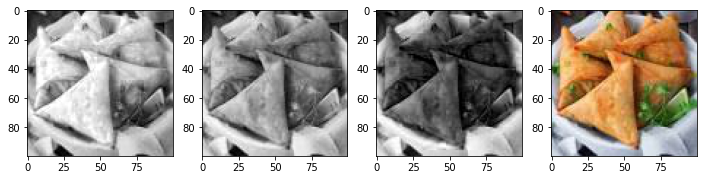

In [236]:
# Show some sample Jalebis and Samosas using pyplot
plt.figure(figsize=(12,8))
plt.gray()
imgA = plt.imread(samosa_list[1])
plt.subplot(241)
plt.imshow(imgA[:,:,0])
plt.subplot(242)
plt.imshow(imgA[:,:,1])
plt.subplot(243)
plt.imshow(imgA[:,:,2])
plt.subplot(244)
plt.imshow(imgA[:,:])
imgA.shape

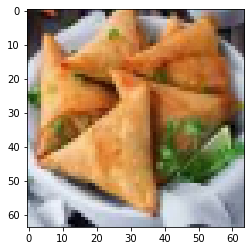

In [237]:
tmp = resize(imgA,(64,64))
plt.imshow(tmp)

In [63]:
3*64**2

12288

In [64]:
### Images are matrices. So, one can compute means over different axes!
imgA.mean((0,1))

array([164.7584,  77.9612,  26.7178])

In [163]:
# We would like to extract some features 
# to be able to compare apples vs oranges

# Can  you think of what features might be 
# most useful?

nFeatures = 3#*64**2
# Initialise empty arrays to hold some features
jalFeatures = np.zeros((nJalebi,nFeatures))
samFeatures = np.zeros((nSamosa,nFeatures))

In [204]:
# We need to assign "labels" to distinguish 
# apples from oranges

# Usually the two classes are mapped to two numbers
# We use 0 -> oranges and 1 -> apples
labels = ['Jalebi','Samosa']
jalLabels = np.ones(nJalebi)*0
samLabels = np.ones(nSamosa)*1

In [206]:
# Feature extraction 
# One of the basic features that can be extracted is the average intensity
# of the R, G, B channels. 
# Steps:
# 1. Load image data
# 2. Convert it into numpy array
# 3. Extract 3 features 

for i in range(nJalebi):
    img = plt.imread(jalebi_list[i])
    img = resize(img,(64,64))
    jalFeatures[i] = img.mean((0,1))


In [207]:
for i in range(nSamosa):
    img = plt.imread(samosa_list[i])
    img = resize(img,(64,64))
    samFeatures[i] = img.mean((0,1))


Text(0, 0.5, 'Average-Blue')

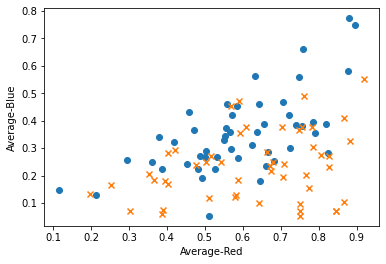

In [208]:
# Visualise the pairwise features
plt.scatter(samFeatures[:,0],samFeatures[:,2],marker='o')
plt.scatter(jalFeatures[:,0],jalFeatures[:,2],marker='x')
plt.xlabel('Average-Red')
plt.ylabel('Average-Blue')

In [209]:
from mpl_toolkits.mplot3d import Axes3D 

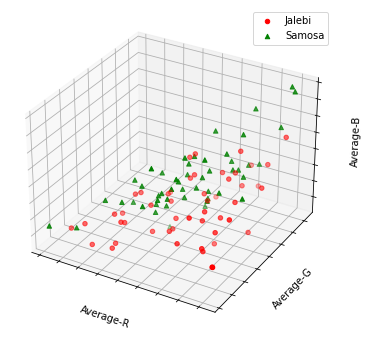

In [210]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(jalFeatures[:,0],jalFeatures[:,1],
           jalFeatures[:,2],c='r',marker='o',label='Jalebi')
ax.scatter(samFeatures[:,0],samFeatures[:,1],
           samFeatures[:,2],c='g',marker='^',label='Samosa')
ax.set_xlabel('Average-R')
ax.set_ylabel('Average-G')
ax.set_zlabel('Average-B')
plt.legend()
ax = plt.gca()
ax.xaxis.set_ticklabels([]);
ax.yaxis.set_ticklabels([]);
ax.zaxis.set_ticklabels([]);

In [211]:
# make the dataset

# Combine features of both Jalebis and Samosas into
# a single array. Same for labels. 
X = np.concatenate((jalFeatures,samFeatures),axis=0)
print(X.shape)
Y = np.concatenate((jalLabels,samLabels))
print(Y.shape)


(100, 3)
(100,)


In [212]:
# Let us shuffle the data! 
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.25)
print(xTrain.shape,xTest.shape)

(75, 3) (25, 3)


In [213]:
# Now that our data is ready. Let us use a classifier.

# We will use another linear classifier
# Logistic regression learns a linear boundary 
# to classify binary class of inputs

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
### You can try other models too

In [219]:
clf = LogisticRegression().fit(xTrain, yTrain)
# clf = Perceptron().fit(xTrain, yTrain)
# clf = RandomForestClassifier().fit(xTrain, yTrain)

# Print the model coefficients.
# print("Logistic regression parameters: ",clf.coef_[0],clf.intercept_[0])


In [220]:
# Check the performance on the training dataset
yTrPred = clf.predict(xTrain)
print(clf.score(xTrain,yTrain))
print(clf.score(xTest,yTest))

0.7733333333333333
0.56


In [223]:
### Inference for new data


(1, 3)

Jalebi


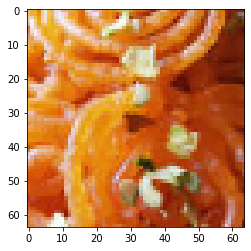

In [234]:
for i in range(len(X_inference)):
    img = plt.imread(jalebi_list[4])
    img = resize(img,(64,64))
    X_inference = img.mean((0,1)).reshape(1,-1)
#     X_inference.shape
    pred = int(clf.predict(X_inference))
    print(labels[pred])
    plt.imshow(img)

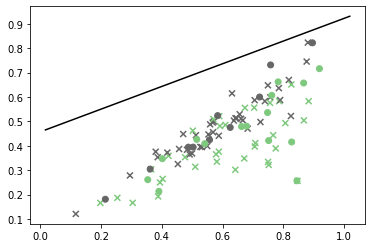

In [250]:
### Plotting the decision boundary

w = clf.coef_[0]
a = -w[0] / w[1]
xMax = X[:,0].max()+0.1
xMin = X[:,0].min()-0.1
yMax = X[:,1].max()+0.1
yMin = X[:,1].min()-0.1

xx = np.linspace(xMax, xMin) 
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(xTrain[:,0],xTrain[:,1],c=yTrain,cmap='Accent',marker='x')

plt.scatter(xTest[:,0],xTest[:,1],c=yTest,cmap='Accent',marker='o')

Text(0.5, 0, 'B')

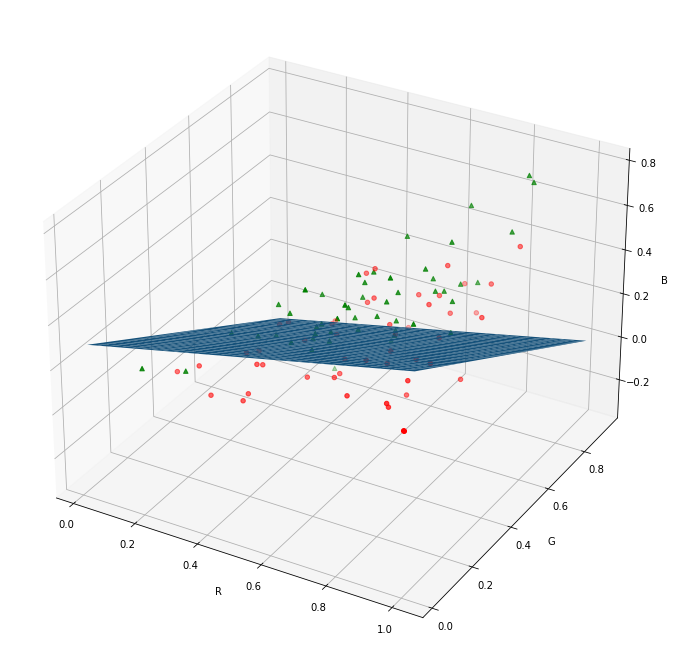

In [253]:
### Plotting the decision boundary in 3d when using 3 features
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x 
                 -clf.coef_[0][1]*y) / clf.coef_[0][2]

xtmp = np.linspace(xMin,xMax,30)
ytmp = np.linspace(yMin,yMax,30)
x,y = np.meshgrid(xtmp,ytmp)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(jalFeatures[:,0],jalFeatures[:,1],jalFeatures[:,2],c='r',marker='o')
ax.scatter(samFeatures[:,0],samFeatures[:,1],samFeatures[:,2],c='g',marker='^')

ax.plot_surface(x, y, z(x,y))
# plt.xlabel('R')
# plt.ylabel('G')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')